# 데이터 전처리

## 라이브러리 import

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import os, random, time, gc, warnings

from tqdm import tqdm_notebook

import lightgbm as lgbm
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFECV


from sklearn.cluster import KMeans

from datetime import datetime

from math import sqrt

warnings.filterwarnings('ignore')

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)

%matplotlib inline

## 데이터 전처리

In [3]:
df=pd.read_csv('D:\\test2\\Events_3.csv')
print(df.shape)
df.head()

(375, 8)


,index,m1buffer,m1~m2,m2buffer,m2~m3,m3buffer,cycletime,0:00:37
0,1,2,3,8,5,4,0:13:34,NaN
1,2,1,2,6,3,2,0:08:38,NaN
2,3,1,4,5,3,5,0:11:06,NaN
3,4,2,4,5,7,5,0:14:11,NaN
4,5,1,4,5,8,2,0:12:20,NaN


In [4]:
df.describe()

,index,m1buffer,m1~m2,m2buffer,m2~m3,m3buffer,0:00:37
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,0.0
mean,188.000000,2.000000,2.437333,5.930667,5.554667,3.474667,NaN
std,108.397417,0.843345,1.109364,1.399195,1.738699,1.101177,NaN
min,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,NaN
25%,94.500000,1.000000,1.000000,5.000000,4.000000,3.000000,NaN
50%,188.000000,2.000000,2.000000,6.000000,6.000000,3.000000,NaN
75%,281.500000,3.000000,3.000000,7.000000,7.000000,4.000000,NaN
max,375.000000,3.000000,4.000000,8.000000,8.000000,5.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      375 non-null    int64  
 1   m1buffer   375 non-null    int64  
 2   m1~m2      375 non-null    int64  
 3   m2buffer   375 non-null    int64  
 4   m2~m3      375 non-null    int64  
 5   m3buffer   375 non-null    int64  
 6   cycletime  375 non-null    object 
 7   0:00:37    0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 23.6+ KB


In [6]:
n=df.isnull().sum()
n

index          0
m1buffer       0
m1~m2          0
m2buffer       0
m2~m3          0
m3buffer       0
cycletime      0
0:00:37      375
dtype: int64

In [7]:
drop_column=['index', '0:00:37']
df_dropped=df.drop(drop_column, axis=1, inplace=False)

In [8]:
df_dropped.head()

,m1buffer,m1~m2,m2buffer,m2~m3,m3buffer,cycletime
0,2,3,8,5,4,0:13:34
1,1,2,6,3,2,0:08:38
2,1,4,5,3,5,0:11:06
3,2,4,5,7,5,0:14:11
4,1,4,5,8,2,0:12:20


In [9]:
#sns.lineplot(data=df_dropped, x="MCOut1", y="MCOut3")

In [10]:
#문자열을 datetime 타입으로 변경
#dateval1 = time.strptime("25-01-2013 00:00:03:238", "%d-%m-%Y %H:%M:%S:%f")
#df_dropped['MCIn1'] = pd.to_datetime(df_dropped['MCIn1'], format="%H:%M")
#df_dropped['MCOut1'] = pd.to_datetime(df_dropped['MCOut1'], format="%H:%M")
#df_dropped['MCln2'] = pd.to_datetime(df_dropped['MCln2'], format="%H:%M")
#df_dropped['MCOut2'] = pd.to_datetime(df_dropped['MCOut2'], format="%H:%M")
#df_dropped['MCIn3'] = pd.to_datetime(df_dropped['MCIn3'], format="%H:%M")
df_dropped['cycletime'] = pd.to_datetime(df_dropped['cycletime'], format="%H:%M:%S")

In [11]:
#df_dropped_NotCompleted = df_dropped[df_dropped['completed'] == 0]

In [12]:
#df_dropped_NotCompleted

In [13]:
# 로그 데이터를 이용해 공정 내 제품 위치를 파악할 수 있는 로직 구현
# M1Buffer, M1~M2Conveyor, M2Buffer, M2~M3Conveyor, M3Buffer, (M3~M1Conveyor)

In [14]:
# index 38번째 들어오는 제품의 M3Out3 시간 기록
# 이것이 target variable

In [15]:
# 제품 위치 파악 => 그 다음 들어오는 제품의 M3Out 시간
# 이것이 한개의 데이터 셋

In [16]:
# 방법 2
# 단순히 한 개의 제품을 추척해 M1In ~ M3Out 시간 취합
# 취합된 데이터로 분석

In [17]:
#df_dropped['target'] = df_dropped['MCOut3'] - df_dropped['MCIn1']

In [18]:
#df_dropped['target'].head()

In [19]:
df_dropped.head()

,m1buffer,m1~m2,m2buffer,m2~m3,m3buffer,cycletime
0,2,3,8,5,4,1900-01-01 00:13:34
1,1,2,6,3,2,1900-01-01 00:08:38
2,1,4,5,3,5,1900-01-01 00:11:06
3,2,4,5,7,5,1900-01-01 00:14:11
4,1,4,5,8,2,1900-01-01 00:12:20


In [20]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   m1buffer   375 non-null    int64         
 1   m1~m2      375 non-null    int64         
 2   m2buffer   375 non-null    int64         
 3   m2~m3      375 non-null    int64         
 4   m3buffer   375 non-null    int64         
 5   cycletime  375 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 17.7 KB


In [21]:
#timedelta64로 형변환시켜주기위함
df_dropped['cycletime_td'] = df_dropped['cycletime'] - pd.datetime(1900, 1, 1, 00, 00, 00)
df_dropped['cycletime_td'].head()

0   0 days 00:13:34
1   0 days 00:08:38
2   0 days 00:11:06
3   0 days 00:14:11
4   0 days 00:12:20
Name: cycletime_td, dtype: timedelta64[ns]

In [22]:
#초단위로 시간 변환
df_dropped['cycletime_td']=df_dropped['cycletime_td'].dt.total_seconds()
df_dropped['cycletime_td'].head()

0    814.0
1    518.0
2    666.0
3    851.0
4    740.0
Name: cycletime_td, dtype: float64

In [23]:
drop_column=['cycletime']
df_dropped_2=df_dropped.drop(drop_column, axis=1, inplace=False)
df_dropped_2.head()

,m1buffer,m1~m2,m2buffer,m2~m3,m3buffer,cycletime_td
0,2,3,8,5,4,814.0
1,1,2,6,3,2,518.0
2,1,4,5,3,5,666.0
3,2,4,5,7,5,851.0
4,1,4,5,8,2,740.0


In [24]:
# 범주형 데이터 변환

#df_dropped_ohe = pd.get_dummies(df_dropped, columns=['Uid','CycleState', 'completed'])
#df_dropped_ohe.head()

## BaseLine_LinearRegression

In [25]:
# 평가함수 정의
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmsle(y, pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y - log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.10f}, RMSE: {1:.10f}, MAE: {2:.10f}'.format(rmsle_val, rmse_val, mae_val))

In [26]:
# 데이터 분할
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = df_dropped_2['cycletime_td']
X_features = df_dropped_2.drop(['cycletime_td'],axis=1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 0.0000000000, RMSE: 0.0000000000, MAE: 0.0000000000


In [27]:
#cross_val_score()로 5 폴드 세트
from sklearn.model_selection import cross_val_score

y_target = df_dropped_2['cycletime_td']
X_features = df_dropped_2.drop(['cycletime_td'],axis=1,inplace=False)

# cross_val_score()로 5 폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr_reg, X_features, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0. -0. -0. -0. -0.]
 5 folds 의 개별 RMSE scores : [0. 0. 0. 0. 0.]
 5 folds 의 평균 RMSE : 0.000


In [28]:
def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

    real_count  predicted_count          diff
31       925.0            925.0  1.136868e-13
80       481.0            481.0  5.684342e-14
0        703.0            703.0  0.000000e+00
84       777.0            777.0  0.000000e+00
82       703.0            703.0  0.000000e+00


<AxesSubplot:>

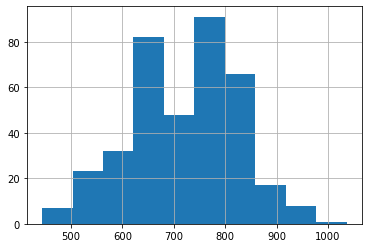

In [29]:
y_target.hist()

<AxesSubplot:>

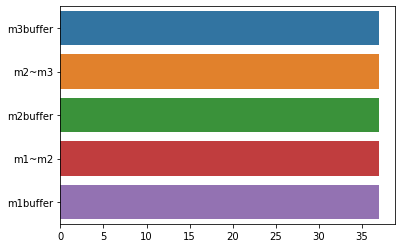

In [30]:
coef=pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [31]:
corr = df_dropped_2.corr(method = 'pearson')
corr

,m1buffer,m1~m2,m2buffer,m2~m3,m3buffer,cycletime_td
m1buffer,1.000000,-0.042869,-0.015861,-0.018235,0.112287,0.308091
m1~m2,-0.042869,1.000000,0.024754,0.016683,-0.014983,0.398793
m2buffer,-0.015861,0.024754,1.000000,-0.050094,-0.027174,0.461407
m2~m3,-0.018235,0.016683,-0.050094,1.000000,-0.014986,0.589185
m3buffer,0.112287,-0.014983,-0.027174,-0.014986,1.000000,0.396950
cycletime_td,0.308091,0.398793,0.461407,0.589185,0.396950,1.000000


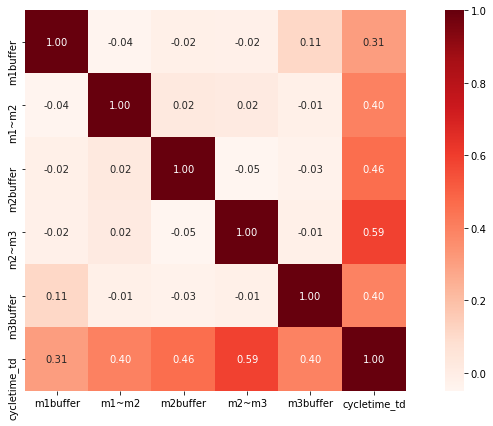

In [32]:
plt.subplots(figsize=(14,7))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Reds')

# Modeling
## LightGBM

In [33]:
import lightgbm as lgb

# LightGBM dataSet으로 변환
y_target = df_dropped_2['cycletime_td']
X_features = df_dropped_2.drop(['cycletime_td'],axis=1,inplace=False)
X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, random_state=0)

train_LightGBM = lgb.Dataset(X_train, label = y_train) 
test_LightGBM = lgb.Dataset(X_test, label = y_test) 

In [34]:
#파라미터 세팅
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [35]:
#학습
model = lgb.train(params, train_LightGBM, 1000, test_LightGBM, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 5
[LightGBM] [Info] Start training from score 719.099237
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's l2: 2053.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	valid_0's l2: 571.451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [36]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)

In [38]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  147.80090295756438
R2 score:  0.9871059953112079


In [39]:
final_result_LightGBM = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result_LightGBM.columns = ['label','predict']

<AxesSubplot:xlabel='label', ylabel='predict'>

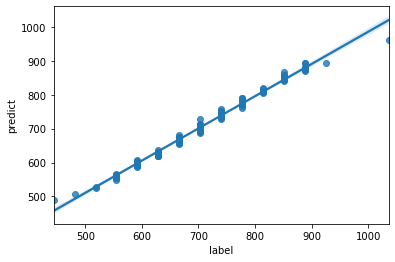

In [40]:
#fit 결과 확인
sns.regplot(x = 'label', y = 'predict', data = final_result_LightGBM)

## Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

y_target = df_dropped_2['cycletime_td']
X_features = df_dropped_2.drop(['cycletime_td'],axis=1,inplace=False)
X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, random_state=0)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred=ridge_reg.predict(X_test)

print("훈련 세트의 정확도 : {:.2f}".format(ridge_reg.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge_reg.score(X_test,y_test)))
evaluate_regr(y_test,pred)

훈련 세트의 정확도 : 1.00
테스트 세트의 정확도 : 1.00
RMSLE: 0.0004550923, RMSE: 0.2900691245, MAE: 0.2286967204
